# Chapter 4 Text visualization

ดาวโหลด dataset 

In [ ]:
!wget https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-1.csv
!wget https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-2.csv
!wget https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-3.csv

!pip install pythainlp[full]

--2021-04-16 07:39:57--  https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19609 (19K) [text/plain]
Saving to: ‘burgerking-UTF8-traindataset-1.csv’

burgerking-UTF8-tra 100%[===================>]  19.15K  --.-KB/s    in 0.001s  

2021-04-16 07:39:57 (32.6 MB/s) - ‘burgerking-UTF8-traindataset-1.csv’ saved [19609/19609]

--2021-04-16 07:39:57--  https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:
!pip install pythainlp[full]

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('burgerking-UTF8-traindataset-1.csv')

import re
import string
from pythainlp.corpus.common import thai_stopwords

def clean_text(txt):
    
    
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)
    
    # ลบ hashtag
    txt = re.sub(r'#','',txt)

    # ลบ space
    txt = re.sub(r' ','',txt)
    
    #ลบ เลข
    txt = re.sub("(\d)", "",txt)
    
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)
    
    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())

    
    return txt

df.message = df.message.apply(clean_text)

ModuleNotFoundError: ignored

In [ ]:
df.columns = ['label','message']
df["label"].replace({0: "negative", 1: "postive"}, inplace=True)

# Understand Data with Exploratory Data Analysis

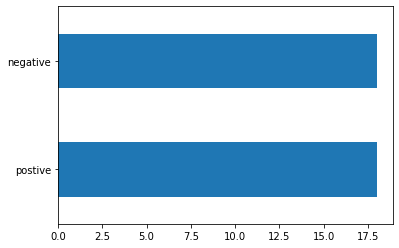

In [ ]:
df.label.value_counts().plot.barh()
plt.show()

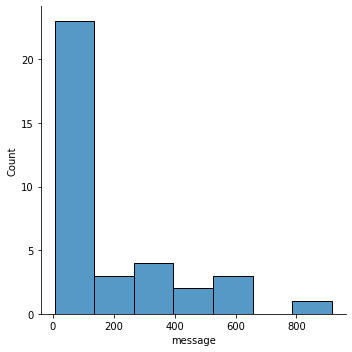

In [ ]:
import seaborn as sns
sns.displot(df.message.apply(len))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


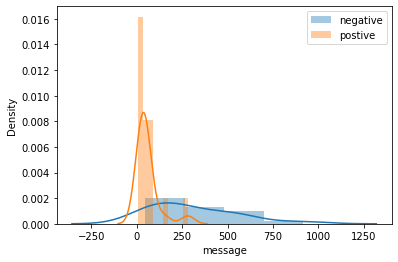

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns



# Sort the dataframe by target
target_0 = df.loc[df['label'] == 'negative']
target_1 = df.loc[df['label'] == 'postive']

sns.distplot(target_0.message.apply(len), hist=True, label='negative')
sns.distplot(target_1.message.apply(len), hist=True, label='postive')
plt.legend()
plt.show()

In [ ]:
from pythainlp.util import find_keyword
from pythainlp.util import rank 
from pythainlp.tokenize import word_tokenize

def get_text_list(message):
  tokenized =[]
  for i in message:
    token = word_tokenize(i)
    for j in token:
      tokenized.append(j)
  
  return tokenized

text = get_text_list(df.message)
#rank(text)

find_keyword(text, min_len=3)

{' ': 25,
 'BurgerKing': 7,
 'กก': 8,
 'กิน': 16,
 'ขอบคุณ': 3,
 'ขอให้': 4,
 'ขาย': 3,
 'คน': 7,
 'คิง': 4,
 'คุณภาพ': 5,
 'ชอบ': 10,
 'ชิ้น': 6,
 'ซื้อ': 3,
 'ดี': 11,
 'ทราบ': 3,
 'ทอง': 3,
 'ทาน': 4,
 'ทำ': 6,
 'นั่ง': 3,
 'น่ารัก': 4,
 'น้ำเสียง': 3,
 'บริการ': 14,
 'บอ': 5,
 'ประทับใจ': 3,
 'ปรับปรุง': 7,
 'ผม': 3,
 'ผู้จัดการ': 4,
 'พนักงาน': 21,
 'พาย': 4,
 'พารากอน': 3,
 'พี่': 3,
 'ฟ': 4,
 'รอ': 3,
 'รอบ': 3,
 'ริ': 5,
 'ร้าน': 4,
 'ลูกค้า': 12,
 'สอง': 3,
 'สั่ง': 9,
 'สาขา': 22,
 'หล่อ': 3,
 'หัวหน้างาน': 4,
 'ห่อ': 3,
 'อร': 3,
 'อร่อย': 10,
 'ออเดอร์': 3,
 'อาหาร': 10,
 'เจอ': 3,
 'เดี๋ยว': 3,
 'เนื้อ': 3,
 'เบอร์เกอร์': 7,
 'เฟรนฟ': 8,
 'เลี่ยน': 3,
 'เส': 5,
 'เหมือน': 5,
 'แก้ว': 4,
 'แบบนี้': 4,
 'แผ่น': 4,
 'แย่': 3,
 'โต๊ะ': 6,
 'โพ': 3,
 'ใส่': 3,
 'ไก่': 4,
 '์': 3}

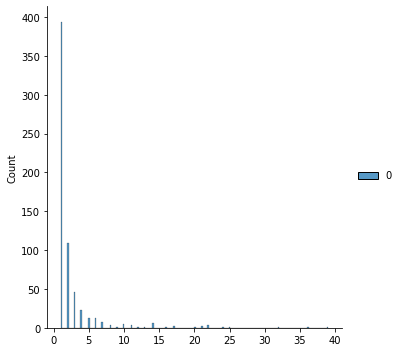

In [ ]:
sns.displot(rank(text).values())

# Text cloud




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud


In [ ]:
regexp = r"[ก-๙a-zA-Z']+"

In [ ]:
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

def get_text_str(message):
  tokenized =" "
  th_stw = thai_stopwords()
  for i in message:
    token = word_tokenize(i)
    for j in token:
      if j not in thai_stopwords():
        tokenized =tokenized + " " + j
  
  return tokenized


text = get_text_str(df.message)

In [ ]:
df.message

0     นไปที่สาขาในปั๊มคาลเท็กซ์ประชานุกูลซื้อพายไก่แ...
1     BKทุกสาขาบริการดีโดยเฉพาะอย่างยิ่งเอมโพเรียมแม...
2     BurgerKingสาขาTheBrightพระรามบริการห่วยมากถึงม...
3     BurgerKingสาขาปั้มปตทบ้านพรอถลาง เมื่อคืนวันจั...
4        chickenstripชิ้นเล็กมากเทียบกับป้ายโฆษณาบนโต๊ะ
5     Deliveryไม่ทั่วถึงสาขาที่ใกล้เราที่สุดอยู่ทองห...
6     กิจกรรมที่จัดห่วยแตกได้รางวัลไม่แจ้งทางอินบ๊อก...
7     ขอแก้ไขรีวิวล่าสุดที่ไปมาตอนนี้อร่อยทุกอย่างแล...
8     ขอคอมเม้นต์นิดนึงครับวันนี้ผมมากินที่สาขาทางด่...
9     ขอบคุณที่ร่วมแชร์ประสบการณ์แย่ๆนะครับ สาขาEsso...
10    ขอร้องเรียนSupervisorผู้หญิงที่สาขาcentralworl...
11    ควรที่จะต้องปรับปรุงมารยาทพนักงานโดยเฉพาะที่สา...
12    ควรใส่ใจในการตรวจสอบสินค้ามากกว่านี้ไปมารอบขาด...
13    คืนวันที่มคไปใช้บริการBurgerKingสาขารามอินทราป...
14    ช่วงทุ่มไปใช้บริการที่หน้าร้านลูกค้าต่อคิวกันย...
15    ดูภาพwhopperที่ได้เทียบกับโฆษณาแล้วเอาไปปรับปร...
16    เดี๋ยวนี้คุณภาพรสชาติตกลงเยอะมากเบอร์เกอร์ที่ไ...
17    เดี๋ยวนี้เฟรนฟรายเค็มมากค่ะ ไม่รู้ว่าเกลือ

In [ ]:
!wget https://www.f0nt.com/download/sipafonts/THSarabunNew.zip ; unzip THSarabunNew.zip

--2021-04-15 20:07:53--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2021-04-15 20:07:55--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip.1’

THSarabunNew.zip.1  100%[===================>] 423.87K   209KB/s    in 2.0s    

2021-04-15 20:07:57 (209 KB/s) - ‘THSarabunNew.zip.1’ saved [434047/434047]

Archive:  THSarabunNew.zip
replace THSarabunNew Italic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew Italic.ttf  
replace __MACOSX/._THSarabunNew Italic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename

In [ ]:
path = 'THSarabunNew.ttf'
wordcloud = WordCloud(
                      font_path=path, 
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000, 
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                    #   contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

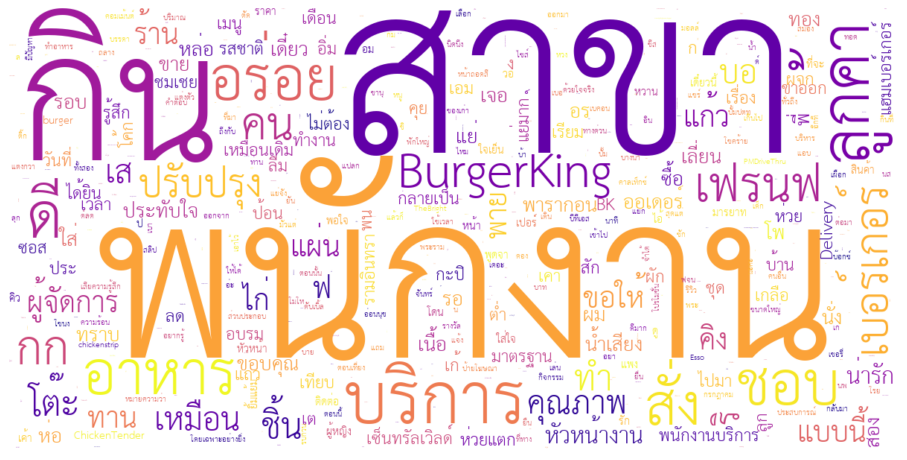

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# Scatter Text 

In [ ]:
df['tokenized'] = df.message.apply(word_tokenize)

In [ ]:
import collections
neg = df.loc[df.label=="negative"].tokenized
pos= df.loc[df.label=="postive"].tokenized
all= df.tokenized

count_neg=[]
count_pos=[]
count_all=[]
for i in neg:
    for j in i:
            count_neg.append(j)
for i in pos:
    for j in i:
            count_pos.append(j)  
for i in all:
    for j in i:
            count_all.append(j)   

counter_pos=collections.Counter(count_neg)
counter_neg=collections.Counter(count_pos)
counter_all=collections.Counter(count_all)


your_list_neg = [list(i) for i in counter_neg.items()]
your_list_pos = [list(i) for i in counter_pos.items()]
your_list= [list(i) for i in counter_all.items()]

count = pd.DataFrame(your_list,columns=['Word','Counts'])
count_neg = pd.DataFrame(your_list_neg,columns=['Word','Counts_positive'])
count_pos = pd.DataFrame(your_list_pos,columns=['Word','Counts_negative'])


result = pd.merge(pd.merge(count,count_neg,on='Word'),count_pos,on='Word')

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


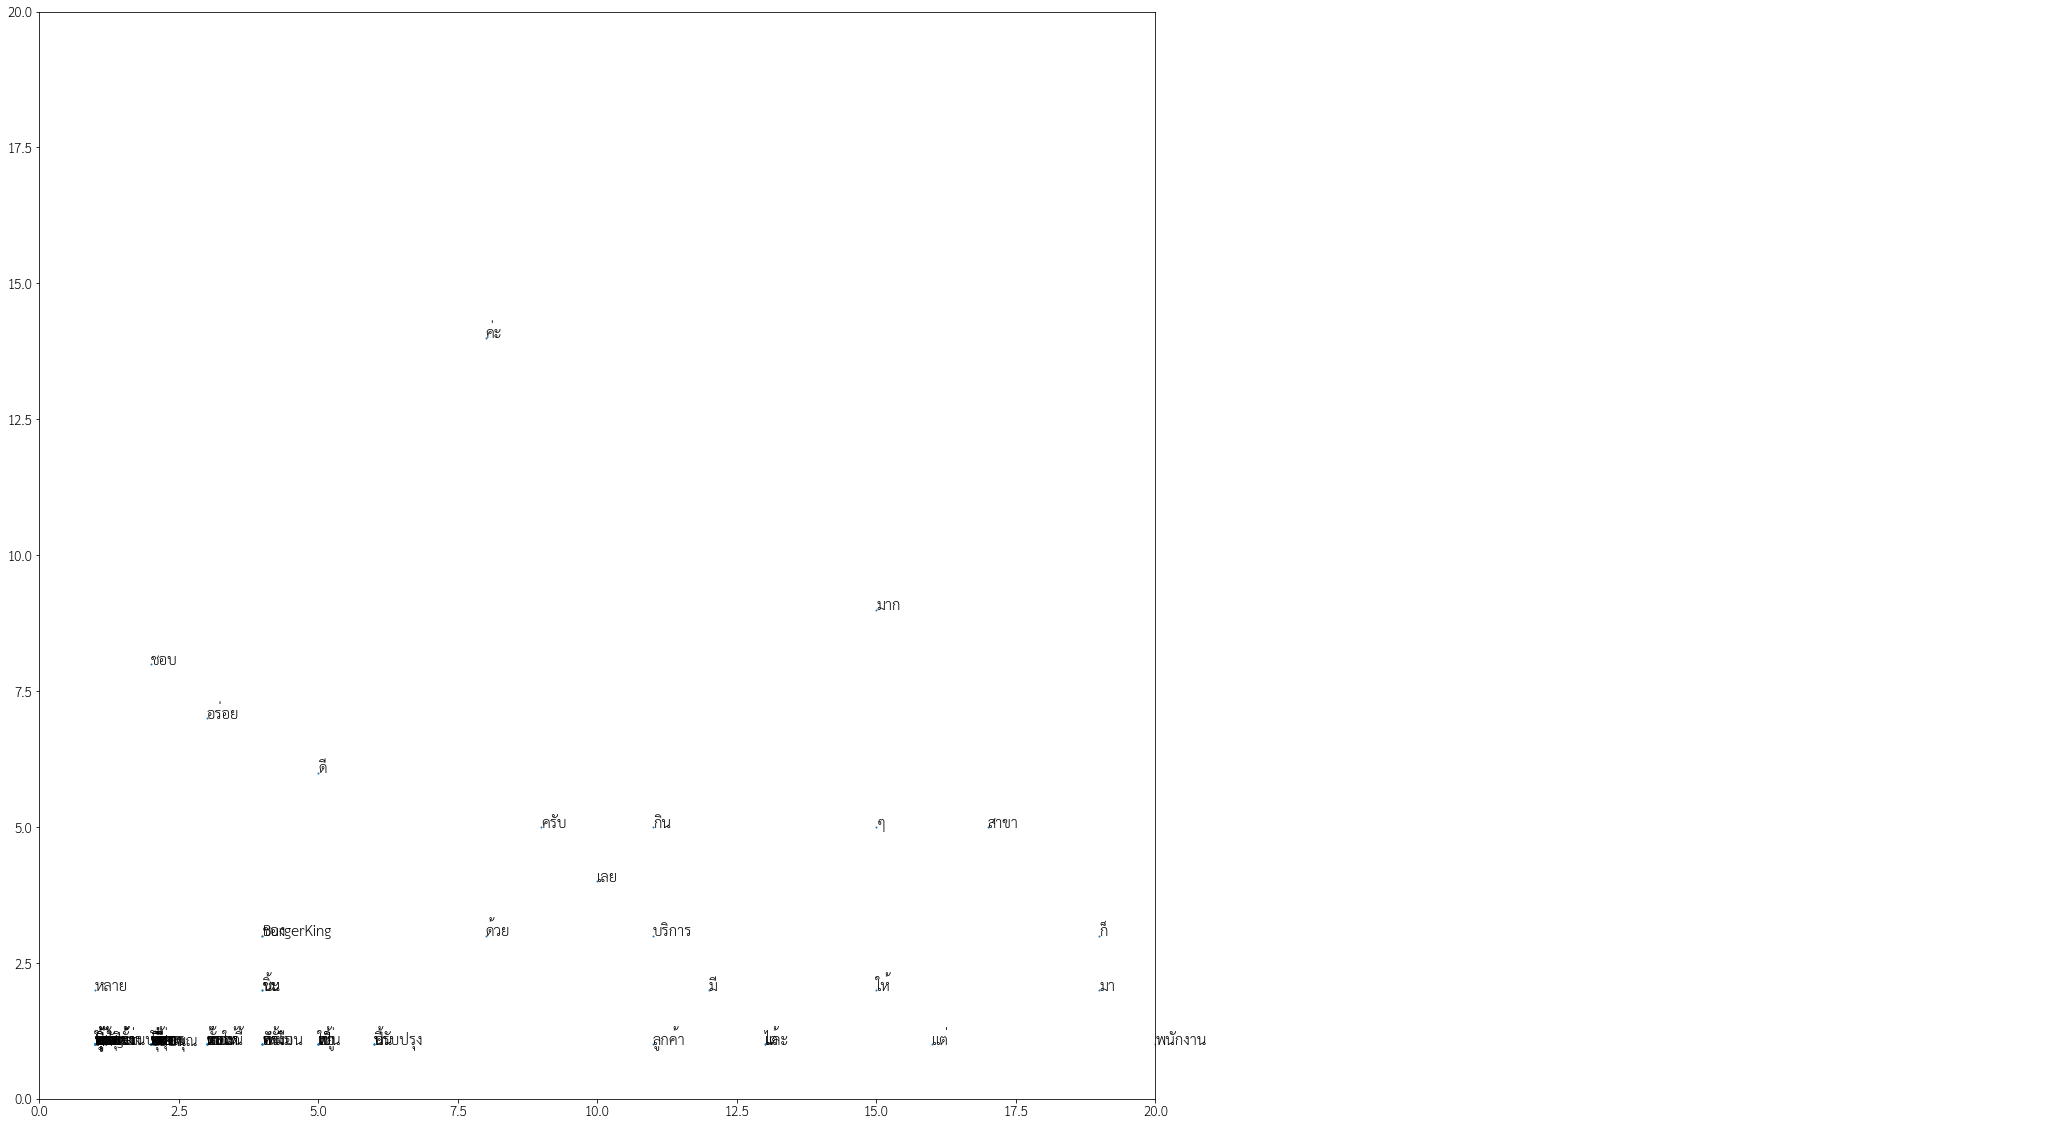

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

import matplotlib.font_manager as fm
from matplotlib import rcParams
x = result.Counts_negative.tolist()
y=result.Counts_positive.tolist()


plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0
plt.figure(figsize=(20, 20))
rcParams.update({'font.size': 22})
plt.scatter(x, y,s=1)
plt.xlim(0,20)
plt.ylim(0,20)


for i, txt in enumerate(result.Word.tolist()):
    plt.annotate(txt, (x[i], y[i]))
plt.savefig('foo.pdf')

# Co-Occurance Analysis

In [ ]:
#!pip install pythainlp[full]
import numpy as np
import pandas as pd
from pythainlp.tokenize import word_tokenize

def create_cooccurrence_matrix(sentences, window_size=4):
    """Create co occurrence matrix from given list of sentences.

    Returns:
    - vocabs: dictionary of word counts
    - co_occ_matrix_sparse: sparse co occurrence matrix

    Example:
    ===========
    sentences = ['I love nlp',    'I love to learn',
                 'nlp is future', 'nlp is cool']

    vocabs,co_occ = create_cooccurrence_matrix(sentences)

    df_co_occ  = pd.DataFrame(co_occ.todense(),
                              index=vocabs.keys(),
                              columns = vocabs.keys())

    df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]

    df_co_occ.style.applymap(lambda x: 'color: red' if x>0 else '')

    """
    import scipy
    import nltk

    vocabulary = {}
    data = []
    row = []
    col = []

    tokenizer = word_tokenize
    #tokenizer = nltk.tokenize.word_tokenize

    for sentence in sentences:
        sentence = sentence.strip()
        
        tokens = [token for token in tokenizer(sentence) if token != u""]
        for pos, token in enumerate(tokens):
            i = vocabulary.setdefault(token, len(vocabulary))
            start = max(0, pos-window_size)
            end = min(len(tokens), pos+window_size+1)
            for pos2 in range(start, end):
                if pos2 == pos:
                    continue
                j = vocabulary.setdefault(tokens[pos2], len(vocabulary))
                data.append(1.)
                row.append(i)
                col.append(j)

    cooccurrence_matrix_sparse = scipy.sparse.coo_matrix((data, (row, col)))
    return vocabulary, cooccurrence_matrix_sparse


In [ ]:
#import nltk
#nltk.download('punkt')
#sentences = ['I love nlp',    'I love to learn',
#             'nlp is future', 'nlp is cool']
sentences = df.message
vocabs,co_occ = create_cooccurrence_matrix(sentences)

df_co_occ  = pd.DataFrame(co_occ.todense(),
                          index=vocabs.keys(),
                          columns = vocabs.keys())

df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]

df_co_occ.style.applymap(lambda x: 'color: red' if x>0 else '')



In [ ]:
df_co_occ


,\r,,!!!,"""",#,%,',(,(ป๊ม,(พนง.,),)\r,-,.,1,1.,11.30,182,2,2.,24,2559,26,3,3.,30,31,4,4.,5.,50,5555,6.,6.5,60,:,:)\r\r,?),BBQ,BK,...,ใจดี,ใจต่ำ,ใจเย็น,ใช่,ใช้,ใช้กับ,ใช้เวลา,ใน,ในขณะที่,ใส่,ใส่ใจ,ใหญ่,ใหม่,ให้,ให้ได้,ไก่,ไง,ไซส์,ได้,ได้ขนาด,ได้ดี,ได้ยิน,ได้รับ,ไป,ไปมา,ไม่,ไม่ค่อย,ไม่ต้อง,ไม่เป็นไร,ไม้,ไร,ไว้,ไห,ไหม,ไอโอดีน,ไอ้,ๆ,ๆๆๆ,์,
\r,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
,21.0,494.0,0.0,3.0,13.0,5.0,2.0,8.0,2.0,2.0,7.0,1.0,2.0,3.0,5.0,3.0,2.0,1.0,23.0,2.0,0.0,4.0,3.0,9.0,2.0,5.0,3.0,4.0,2.0,1.0,5.0,1.0,3.0,4.0,3.0,9.0,1.0,1.0,8.0,3.0,...,0.0,2.0,3.0,2.0,9.0,0.0,2.0,8.0,0.0,3.0,2.0,2.0,3.0,16.0,1.0,7.0,0.0,4.0,18.0,1.0,1.0,4.0,3.0,51.0,5.0,33.0,0.0,3.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0,4.0,28.0,1.0,4.0,7.0
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""",0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
#,0.0,13.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ไอ้,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
ๆ,1.0,28.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
ๆๆๆ,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
์,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#!pip install networkx
# importing networkx 
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = fm.createFontList(['THSarabunNew.ttf'])  
fm.fontManager.ttflist.extend(font_list)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  import sys


In [ ]:
def visual_co_occ_matrix(keyword,top_co_occ = 10):
  ### keyword เป็น str ###
  graph = nx.Graph()
  labels_params = {"font_family": "TH Sarabun Chula",
                 "alpha":1,
                 "font_size":20,
                 "with_labels": True}
  word =[]
  
  for i in df_co_occ.loc[keyword].sort_values(ascending = False).reset_index()['index'][:top_co_occ]:
    if i not in thai_stopwords():
      graph.add_edge(keyword,i)
      word.append(i)
      for j in df_co_occ.loc[i].sort_values(ascending = False).reset_index()['index'][:top_co_occ]:
        if j not in thai_stopwords():
          graph.add_edge(i,j)

  return nx.draw(graph,node_color='#00b4d9', **labels_params)

  

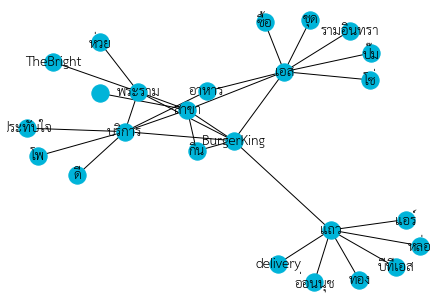

In [ ]:
visual_co_occ_matrix('BurgerKing')
